# Herramientas Computacionales en Química Orgánica: Explorando Estructuras, Propiedades y Búsquedas con RDKit y PubChem

## Introducción
### Motivación
- ¿Por qué usar herramientas computacionales en química orgánica?
- Ejemplo de aplicaciones: diseño de fármacos, predicción de propiedades, minería de datos químicos
### Breve descripción de RDKit y PubChem
- **RDKit**: Biblioteca de código abierto para quimioinformática (manipulación de moléculas, descriptores, fingerprints).
- **PubChem**: Base de datos pública de moléculas y sus propiedades (más de 100 millones de compuestos).

## PubChem + PubChemPy: Minería de Datos Químicos

In [98]:
import pubchempy as pcp

### Busqueda básica: Obteniendo datos de un Compuesto

#### Ejemplo 1: Aspirina (CID 2244)

In [2]:
aspirin = pcp.Compound.from_cid(2244)

In [3]:
print(f"Nombre: {aspirin.iupac_name}")
print(f"Fórmula molecular: {aspirin.molecular_formula}")
print(f"Masa molar: {aspirin.molecular_weight} g/mol")

Nombre: 2-acetyloxybenzoic acid
Fórmula molecular: C9H8O4
Masa molar: 180.16 g/mol


#### Búsqueda por Nombre o SMILES

In [64]:
caffeine = pcp.get_compounds('caffeine', 'name')[0]

In [8]:
print(f"CID de la cafeína: {caffeine.cid}")

CID de la cafeína: 2519


In [24]:
ethanol = pcp.get_compounds('CCO', 'smiles')[0]

In [25]:
print(f"Nombre del SMILES CCO: {ethanol.iupac_name}")

Nombre del SMILES CCO: ethanol


### Exportar Datos para Análisis en RDKit

In [67]:
pcp.download('SDF', 'caffeine.sdf', [caffeine.cid], 'cid')

## RDKit: Análisis Computacional de Moléculas

In [109]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw, Descriptors, rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole

### Cargar y Visualizar Moléculas

#### Desde SMILES

In [69]:
ethanol = Chem.MolFromSmiles('CCO')
benzoic_acid = Chem.MolFromSmiles('c1ccccc1C(=O)O')

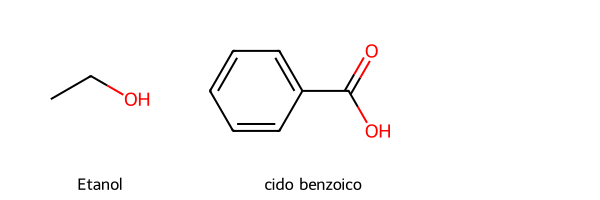

In [70]:
Draw.MolsToGridImage([ethanol, benzoic_acid], legends=['Etanol', 'Acido benzoico'])

|molecula|grupo funcional|
|---|---|
|Etanol|Alcohol|
|Cido benzoico| ácidos carboxílicos|

#### Desde archivos SDF (cargados desde PubChem)

In [72]:
mols = Chem.SDMolSupplier('caffeine.sdf')

In [73]:
mols

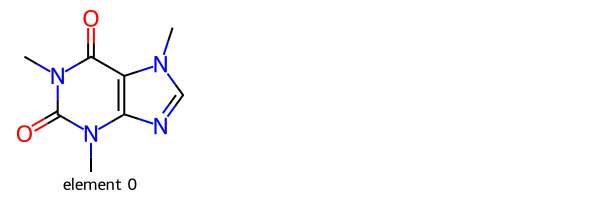

In [76]:
Draw.MolsToGridImage(mols, legends=[f"element {i}" for i in range(len(mols))])

`atoms.get_chemical_formula()`

In [78]:
def print_descriptors(mol):
    print(f"Nombre: {Chem.MolToSmiles(mol)}")
    print(f"Masa molar: {Descriptors.MolWt(mol):.2f} g/mol")
    print(f"LogP: {Descriptors.MolLogP(mol):.2f}")
    print(f"Número de donores de H: {Descriptors.NumHDonors(mol)}")
    print(f"Anillos aromáticos: {Descriptors.NumAromaticRings(mol)}")

# Ejemplo con cafeína
caffeine = mols[0]
print_descriptors(caffeine)

Nombre: Cn1c(=O)c2c(ncn2C)n(C)c1=O
Masa molar: 194.19 g/mol
LogP: -1.03
Número de donores de H: 0
Anillos aromáticos: 2


Aplicación a la química orgánica: Comparación de dos alcoholes

> en palabras coloquiales, el LogP es una medida de qué tanto "prefiere" una molécula estar en grasa (aceite) o en agua

In [79]:
isopropanol = Chem.MolFromSmiles('CC(O)C')
tert_butanol = Chem.MolFromSmiles('CC(C)(C)O')
print_descriptors(isopropanol)
print_descriptors(tert_butanol)

Nombre: CC(C)O
Masa molar: 60.10 g/mol
LogP: 0.39
Número de donores de H: 1
Anillos aromáticos: 0
Nombre: CC(C)(C)O
Masa molar: 74.12 g/mol
LogP: 0.78
Número de donores de H: 1
Anillos aromáticos: 0


### Compara moleculas (alcanos y alquenos)

In [82]:
hexane = Chem.MolFromSmiles('CCCCCC')         # hexano
hex_1_ene = Chem.MolFromSmiles('C=CCCCC')        # hex-1-eno
cyclohexene = Chem.MolFromSmiles('C1=CCCCC1')    # ciclohexeno

#### Visualización y Descriptores Clave

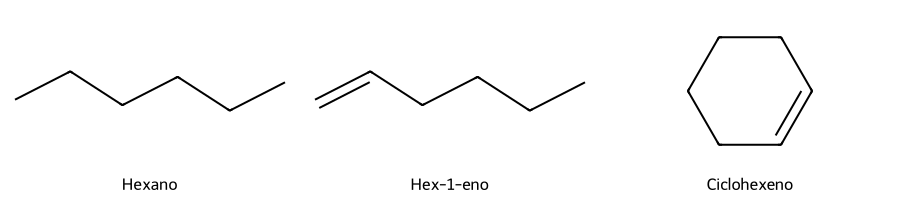

In [83]:
Draw.MolsToGridImage(
    [hexane, hex_1_ene, cyclohexene],
    legends=['Hexano', 'Hex-1-eno', 'Ciclohexeno'],
    subImgSize=(300, 200)
)

In [90]:
def count_double_bonds(mol):
    return sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.DOUBLE) # sum(list[int])

In [89]:
def print_alkane_alkene_props(mol, name):
    print(f"\n--- {name} ---")
    print(f"SMILES: {Chem.MolToSmiles(mol)}")
    print(f"Masa molar: {Descriptors.MolWt(mol):.2f} g/mol")
    print(f"LogP: {Descriptors.MolLogP(mol):.2f}")
    print(f"Átomos de carbono: {mol.GetNumAtoms(onlyExplicit=True)}")
    print(f"Enlaces dobles: {count_double_bonds(mol)}")

In [91]:
print_alkane_alkene_props(hexane, "Hexano")
print_alkane_alkene_props(hex_1_ene, "Hex-1-eno")
print_alkane_alkene_props(cyclohexene, "Ciclohexeno")


--- Hexano ---
SMILES: CCCCCC
Masa molar: 86.18 g/mol
LogP: 2.59
Átomos de carbono: 6
Enlaces dobles: 0

--- Hex-1-eno ---
SMILES: C=CCCCC
Masa molar: 84.16 g/mol
LogP: 2.36
Átomos de carbono: 6
Enlaces dobles: 1

--- Ciclohexeno ---
SMILES: C1=CCCCC1
Masa molar: 82.15 g/mol
LogP: 2.12
Átomos de carbono: 6
Enlaces dobles: 1


#### Búsqueda de Subestructuras
Identificar enlaces dobles (alquenos) y grupos metilo

In [92]:
double_bond = Chem.MolFromSmarts('C=C')  # Enlace doble
methyl_group = Chem.MolFromSmarts('[CH3]')  # Grupo metilo

In [93]:
# Buscar en ciclohexeno
print("\nEn ciclohexeno:")
print(f"¿Tiene enlace doble? {cyclohexene.HasSubstructMatch(double_bond)}")
print(f"¿Tiene grupos metilo? {cyclohexene.HasSubstructMatch(methyl_group)}")


En ciclohexeno:
¿Tiene enlace doble? True
¿Tiene grupos metilo? False


In [112]:
# Contar enlaces dobles en hex-1-eno
matches = hex_1_ene.GetSubstructMatches(double_bond)
print(f"Hex-1-eno tiene {len(matches)} enlace(s) doble(s).") # .size()

Hex-1-eno tiene 1 enlace(s) doble(s).


### Los fingerprints
los fingerprints (o "huellas dactilares moleculares") son representaciones numéricas compactas de la esctructura de una molécula

In [106]:
generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024) #2^n

- `radius` analiza que tan lejos se analiza alrededor de cada átomo
- `fpSize` define el tamaño del vector binario que reprsenta la molécula

In [107]:
fp_hexane = generator.GetCountFingerprint(hexane)
fp_hexene = generator.GetCountFingerprint(hex_1_ene)

In [110]:
sim = DataStructs.TanimotoSimilarity(fp_hexane, fp_hexene)

In [111]:
print(f"Similitud hexano-hexeno: {sim:.2f}") 

Similitud hexano-hexeno: 0.33


Interpretación:

    Valores altos (>0.85): Moléculas muy similares (ej: análogos estructurales).

    Valores medios (0.5-0.7): Comparten algunos rasgos (ej: misma cadena carbonada pero diferente grupo funcional).

Ventajas de los Fingerprints

    Eficiencia: Comparar miles de moléculas en segundos.

    Interpretabilidad: Bits pueden mapearse a subestructuras químicas.

    Versatilidad: Compatibles con algoritmos de IA y análisis estadístico.